In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, bartlett
from  statsmodels.stats.outliers_influence import variance_inflation_factor
from  statsmodels.formula.api import ols
from sklearn.feature_selection import f_regression
import seaborn as sns

In [70]:
df = pd.read_csv("that_nghiep.csv")
df

,Tỉnh/Thành phố,2018,2019,2020,2021,2022,Sơ bộ 2023
0,CẢ NƯỚC,"2,19","2,17","2,48","3,20","2,34","2,28"
1,Đồng bằng sông Hồng,"1,97","1,82","2,05","2,18","1,93","1,86"
2,Hà Nội,"1,80","1,78","2,11","2,68","2,22","2,01"
3,Vĩnh Phúc,"1,76","1,79","2,09","1,48","1,46","1,72"
4,Bắc Ninh,"2,10","2,48","2,19","2,70","2,55","2,68"
...,...,...,...,...,...,...,...
65,Cần Thơ,"3,58","3,18","3,60","3,96","3,72","3,78"
66,Hậu Giang,"1,86","3,11","3,05","5,43","1,69","2,01"
67,Sóc Trăng,"3,40","2,91","2,10","3,13","3,37","3,39"
68,Bạc Liêu,"3,66","3,74","3,48","2,35","2,12","2,05"


In [71]:
df.columns

Index(['Tỉnh/Thành phố', '2018', '2019', '2020', '2021', '2022', 'Sơ bộ 2023'], dtype='object')

In [72]:
df.drop(columns=['2018'], inplace=True)



In [73]:
df.rename(columns={'Sơ bộ 2023' : '2023'}, inplace=True)

In [74]:
df.columns

Index(['Tỉnh/Thành phố', '2019', '2020', '2021', '2022', '2023'], dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tỉnh/Thành phố  70 non-null     object
 1   2019            70 non-null     object
 2   2020            70 non-null     object
 3   2021            70 non-null     object
 4   2022            70 non-null     object
 5   2023            70 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


In [76]:
cols_year = [ '2019', '2020', '2021', '2022', '2023']
df[cols_year] = df[cols_year].apply(lambda x: x.str.replace(',', '.')).astype(float)
df.dtypes

Tỉnh/Thành phố     object
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
dtype: object

In [77]:
df

,Tỉnh/Thành phố,2019,2020,2021,2022,2023
0,CẢ NƯỚC,2.17,2.48,3.20,2.34,2.28
1,Đồng bằng sông Hồng,1.82,2.05,2.18,1.93,1.86
2,Hà Nội,1.78,2.11,2.68,2.22,2.01
3,Vĩnh Phúc,1.79,2.09,1.48,1.46,1.72
4,Bắc Ninh,2.48,2.19,2.70,2.55,2.68
...,...,...,...,...,...,...
65,Cần Thơ,3.18,3.60,3.96,3.72,3.78
66,Hậu Giang,3.11,3.05,5.43,1.69,2.01
67,Sóc Trăng,2.91,2.10,3.13,3.37,3.39
68,Bạc Liêu,3.74,3.48,2.35,2.12,2.05


In [78]:
#đếm số lượng giá trị NaN trong từng biến
nan_count = df.isna().sum()
print('Số lượng giá trị NaN trong từng biến là:', nan_count)

Số lượng giá trị NaN trong từng biến là: Tỉnh/Thành phố    0
2019              0
2020              0
2021              0
2022              0
2023              0
dtype: int64


In [79]:
df.duplicated().sum()

0

In [80]:
# Hàm kiểm tra outliers
def detect_outliers(df):
    lower_bound = df.quantile(0.025)  # Lấy giá trị giới hạn dưới
    upper_bound = df.quantile(0.975)  # Lấy giá trị giới hạn trên
    return df[(df < lower_bound) | (df > upper_bound)]

# Kiểm tra outliers
# for col in df.columns:
#     outliers = detect_outliers(df[col])
#     print(f'{col}: {outliers}')

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Chỉ áp dụng cho cột dạng số
        outliers = detect_outliers(df[col])
        print(f'{col}: {outliers}')
    else:
        print(f'{col}: Không áp dụng do dữ liệu không phải dạng số')

Tỉnh/Thành phố: Không áp dụng do dữ liệu không phải dạng số
2019: 12    0.52
24    0.47
34    4.21
57    5.34
Name: 2019, dtype: float64
2020: 25    0.42
27    0.44
35    9.41
40    4.70
Name: 2020, dtype: float64
2021: 24    0.51
35    8.06
44    0.51
54    9.18
Name: 2021, dtype: float64
2022: 21    6.34
24    0.39
31    5.43
45    0.52
Name: 2022, dtype: float64
2023: 24    0.31
31    5.51
45    0.50
62    4.95
Name: 2023, dtype: float64


<Axes: >

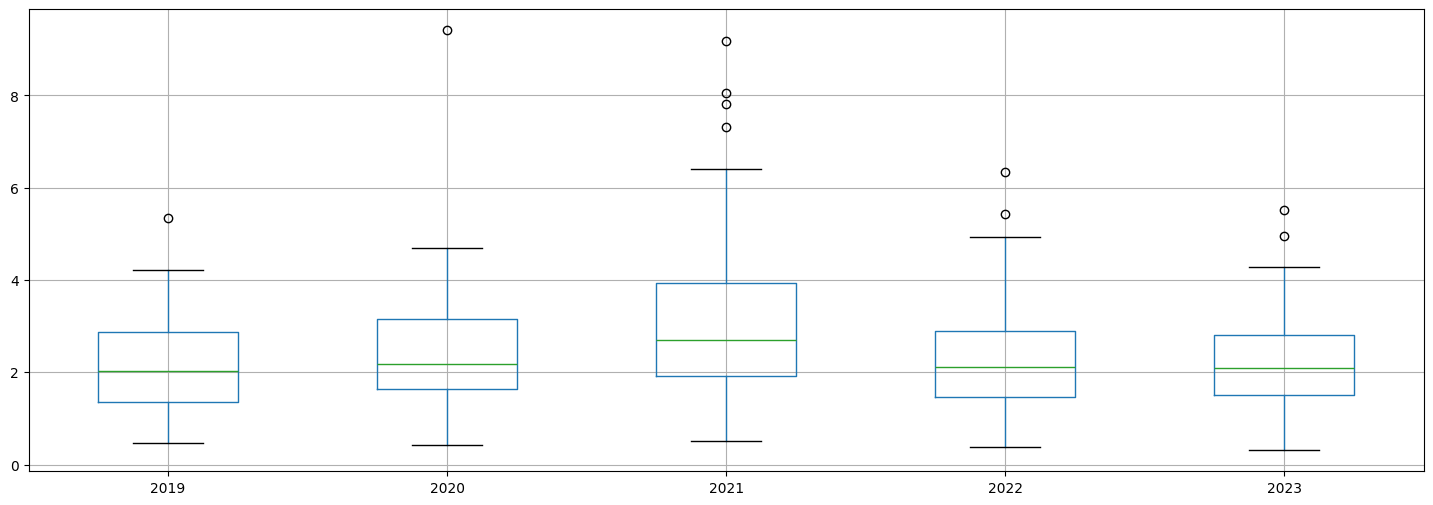

In [81]:
# vẽ boxplot
plt.figure(figsize=(18, 6))
df.boxplot()